# Homogeneous Poisson Process, Inhomogeneous Poisson Process and Absolute Refractoriness in a Homogeneous Poisson Process

In [2]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Spike-train statistics

### 1. a) Interspike interval

In [3]:
spike_times = np.loadtxt('SpikeTimes.dat')  # in ms; dimensions: spike index, trial
spike_times.shape, spike_times[:, 0]  # this is the first trial

((100, 100),
 array([  107.8,   198.6,   199.6,   213.4,   421.6,   446.2,   494.4,
          514. ,   575.8,   902.6,  1243. ,  1268.8,  1269.4,  1299.4,
         1393. ,  1404.8,  1665.2,  1740.6,  1748.8,  2041.4,  2059.2,
         2115. ,  2120.6,  2133.2,  2158. ,  2187.2,  2568.4,  2819.8,
         2825.4,  3255. ,  3267.2,  3315. ,  3319.6,  3333.8,  4021.6,
         4030.4,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,   

In [4]:
isi = np.diff(spike_times, axis=0)
isi.shape, isi[:, 0]

((99, 100), array([  9.08000000e+01,   1.00000000e+00,   1.38000000e+01,
          2.08200000e+02,   2.46000000e+01,   4.82000000e+01,
          1.96000000e+01,   6.18000000e+01,   3.26800000e+02,
          3.40400000e+02,   2.58000000e+01,   6.00000000e-01,
          3.00000000e+01,   9.36000000e+01,   1.18000000e+01,
          2.60400000e+02,   7.54000000e+01,   8.20000000e+00,
          2.92600000e+02,   1.78000000e+01,   5.58000000e+01,
          5.60000000e+00,   1.26000000e+01,   2.48000000e+01,
          2.92000000e+01,   3.81200000e+02,   2.51400000e+02,
          5.60000000e+00,   4.29600000e+02,   1.22000000e+01,
          4.78000000e+01,   4.60000000e+00,   1.42000000e+01,
          6.87800000e+02,   8.80000000e+00,              nan,
                     nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan,              nan,
                     nan,              nan,              na

In [5]:
isi_flattened = isi[~np.isnan(isi)]  # omit nan values

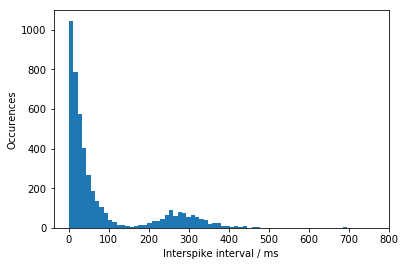

In [6]:
plt.hist(isi_flattened, 70)
plt.xlabel('Interspike interval / ms')
plt.ylabel('Occurences')

The ISI distribution is exponentially decaying, with another Gaussian-like distribution around 280 ms.

### 1. b) Coefficient of variation

In [8]:
cv = np.std(isi_flattened) / np.mean(isi_flattened)
cv

1.3537882337148048

### 1. c) Fano factor

In [9]:
spike_counts = []
for interval in range(4):
    start = interval * 1000
    end = (interval+1) * 1000 - 1
    spike_count = np.sum(np.logical_and(spike_times >= start, spike_times <= end)) / 100
    spike_counts.append(spike_count)
fano_factor = np.var(spike_counts) / np.mean(spike_counts)
fano_factor

/Users/d068730/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in greater_equal
/Users/d068730/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in less_equal


0.67668539951034934

Calculating the Fano factor for smaller time windows (and not for the complete trial at once) yields a higher resolution.

## 2. Homogeneous and inhomogeneous Poisson process

### 2. a) ISI histograms

In [94]:
from scipy.io import loadmat

In [95]:
variables = loadmat('PoissonSpikeTrains.mat')
spike_times = variables['SpikeTimes']
spike_times_inh = variables['SpikeTimes_inh']
spike_times_ref = variables['SpikeTimes_ref']
rates_ref = variables['rates_ref'][0]  # turn this into a vector

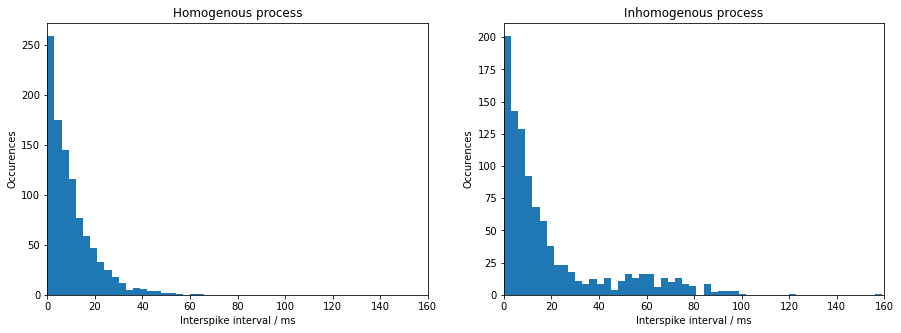

In [99]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for ax, times, title in zip(axes, [spike_times, spike_times_inh], ['Homogenous process', 'Inhomogenous process']):
    isi = np.diff(times, axis=0)
    isi_flattened = isi[~np.isnan(isi)]  # omit nan values
    plt.sca(ax)
    plt.hist(isi_flattened, range(0, 170, 3))
    plt.xlabel('Interspike interval / ms')
    plt.ylabel('Occurences')
    plt.title(title)
    plt.xlim(0, 160)

For the homogenous process, we see only an exponential decay in the ISI histogram. For the inhomogenous process, we see an additional Gaussian-like distribution around 70 ms (like in exercise 1).

### 2. b) Coefficient of variation and Fano factor

In [15]:
for times, title in zip([spike_times, spike_times_inh], ['Homogenous process', 'Inhomogenous process']):
    isi = np.diff(times, axis=0)
    isi_flattened = isi[~np.isnan(isi)]  # omit nan values
    
    cv = np.std(isi_flattened) / np.mean(isi_flattened)
    
    spike_counts = []
    for interval in range(4):
        start = interval * 1000
        end = (interval+1) * 1000 - 1
        spike_count = np.sum(np.logical_and(times >= start, times <= end))
        spike_counts.append(spike_count)
    fano_factor = np.var(spike_counts) / np.mean(spike_counts)
    
    print('{}: CV of {:.3}, Fano factor of {}'.format(title, cv, fano_factor))

Homogenous process: CV of 0.965, Fano factor of 0.133333333333
Inhomogenous process: CV of 1.19, Fano factor of 0.690476190476


### 2. c) Spike-train autocorrelation function

In [120]:
def autocorr(x):
    return np.correlate(x, x, mode='full')

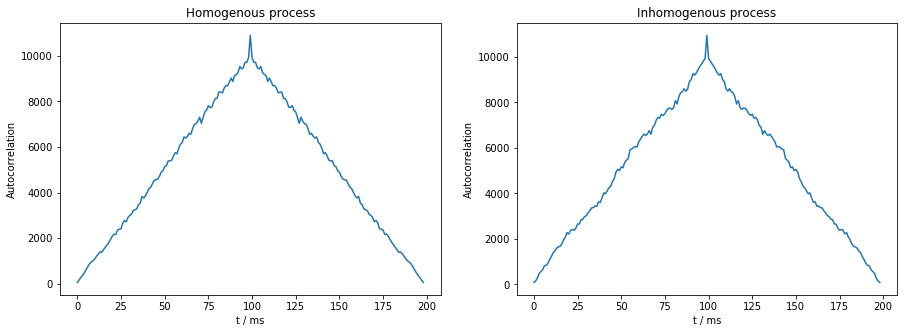

In [121]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for ax, times, title in zip(axes, [spike_times, spike_times_inh], ['Homogenous process', 'Inhomogenous process']):
    plt.sca(ax)
    isi_hist = np.histogram(times.flatten(), 100)[0]
    plt.plot(autocorr(isi_hist))
    plt.xlabel('t / ms')
    plt.ylabel('Autocorrelation')
    plt.title(title)

### 2. d) Theoretical value

The coefficient of variation and the Fano factor differ from the theoretical values of 1 because the neurons investigated here are not completely Poissonian. Especially the inhomogenous process is apparently not a Poisson process, as can be seen in the ISI histogram.

## 3. Poisson process with refractory period

In [21]:
spike_times_ref.shape, spike_times_ref

((1000, 6), array([[  3.14252791e+02,   6.68505583e+01,   3.59252791e+01,
           2.04626396e+01,   1.11850558e+01,   8.09252791e+00],
        [  4.69920125e+02,   1.01984025e+02,   5.59920125e+01,
           3.29960062e+01,   1.91984025e+01,   1.45992012e+01],
        [  6.30921309e+02,   1.38184262e+02,   7.65921309e+01,
           4.57960655e+01,   2.73184262e+01,   2.11592131e+01],
        ..., 
        [  1.02331562e+05,   2.44583124e+04,   1.47241562e+04,
           9.85707810e+03,   6.93683124e+03,   5.96341562e+03],
        [  1.02340249e+05,   2.44640499e+04,   1.47295249e+04,
           9.86226247e+03,   6.94190499e+03,   5.96845249e+03],
        [  1.02543088e+05,   2.45086175e+04,   1.47543088e+04,
           9.87715438e+03,   6.95086175e+03,   5.97543088e+03]]))

In [29]:
spike_times_ref[:, 5]

array([    8.09252791,    14.59920125,    21.15921309,    27.11322869,
          32.82475613,    37.82975487,    43.45371893,    49.26573289,
          54.74939787,    60.37284591,    65.39022752,    70.75095613,
          75.86353656,    83.55419149,    89.02769825,    94.08900779,
         103.71492458,   109.10598568,   114.42079315,   119.73003925,
         124.86951312,   130.19367337,   135.26706775,   141.64918578,
         147.67914005,   155.30812108,   160.40492786,   165.76928171,
         171.82945985,   177.55838497,   183.44133975,   188.75622411,
         194.44604393,   202.32162291,   209.50532801,   214.6355242 ,
         220.76155925,   229.56251533,   234.78426583,   240.20828921,
         246.57737153,   254.44888856,   259.77495389,   267.20784338,
         273.47630192,   279.06260684,   284.78182409,   291.41527894,
         296.80968218,   302.49156425,   307.91970054,   312.9985387 ,
         320.4365582 ,   327.36710634,   332.47416097,   338.23077951,
      

In [22]:
rates_ref.shape, rates_ref

((1, 6), array([[  10,   50,  100,  200,  500, 1000]], dtype=uint16))

### 3. a) Spike count rate

In [38]:
spike_count_rates = len(spike_times_ref) / spike_times_ref[-1]
spike_count_rates

array([ 0.009752  ,  0.04080198,  0.06777681,  0.10124373,  0.14386705,
        0.16735195])

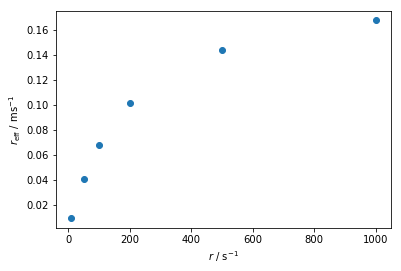

In [50]:
plt.plot(rates_ref, spike_count_rates, 'o')
plt.ylabel('$r_\mathrm{eff}  \ / \ \mathrm{ms}^{-1}$')
plt.xlabel('$r \ / \ \mathrm{s}^{-1}$')

For large driving rates $r$, the effective spike rate $r_\mathrm{eff}$ saturates, because the neuron cannot fire quickly enough due to the refractory period. Its maximum spike rate is the inverse of duration of the refractory period.

### 3. b) ISI histograms

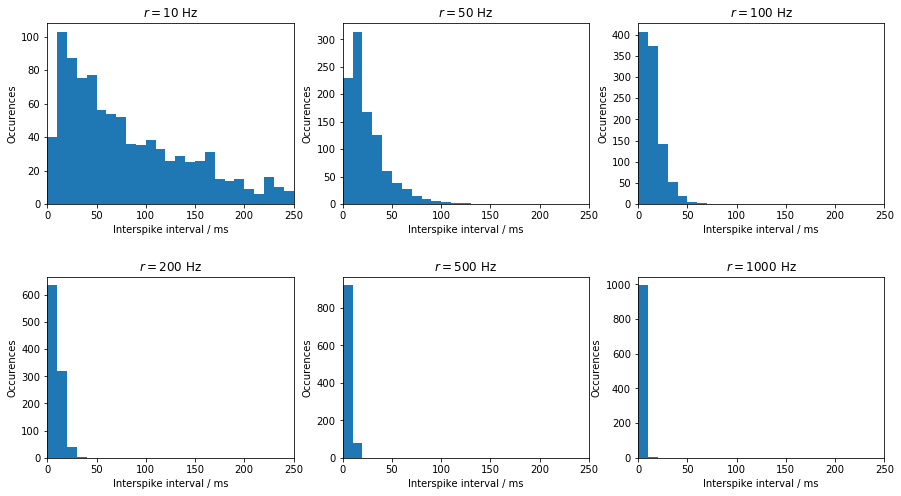

In [93]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
plt.subplots_adjust(hspace=0.4)

for ax, times, rate in zip(axes.flatten(), spike_times_ref.T, rates_ref):
    isi = np.diff(times, axis=0)
    plt.sca(ax)
    plt.hist(isi, range(0, 260, 10))
    plt.xlim(0, 250)
    plt.xlabel('Interspike interval / ms')
    plt.ylabel('Occurences')
    plt.title(r'$r = {} \ \mathrm{{Hz}}$'.format(rate))

The ISIs in the first plot go up to 650 ms - they are not shown here to make the plots comparable.